In [510]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [511]:
songs_df = pd.read_csv('songs.csv')

songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [512]:
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')
print("Variables numericas: ",numerical_cols)
print("Cantidad: ", len(numerical_cols))

Variables numericas:  ['duration_ms', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Cantidad:  13


In [513]:
# Identificamos variables categoricas y numericas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')
print("Variables categoricas: ",categorical_cols)
print("Cantidad: ", len(categorical_cols))

Variables categoricas:  ['artist', 'song', 'explicit', 'genre', 'mode']
Cantidad:  5


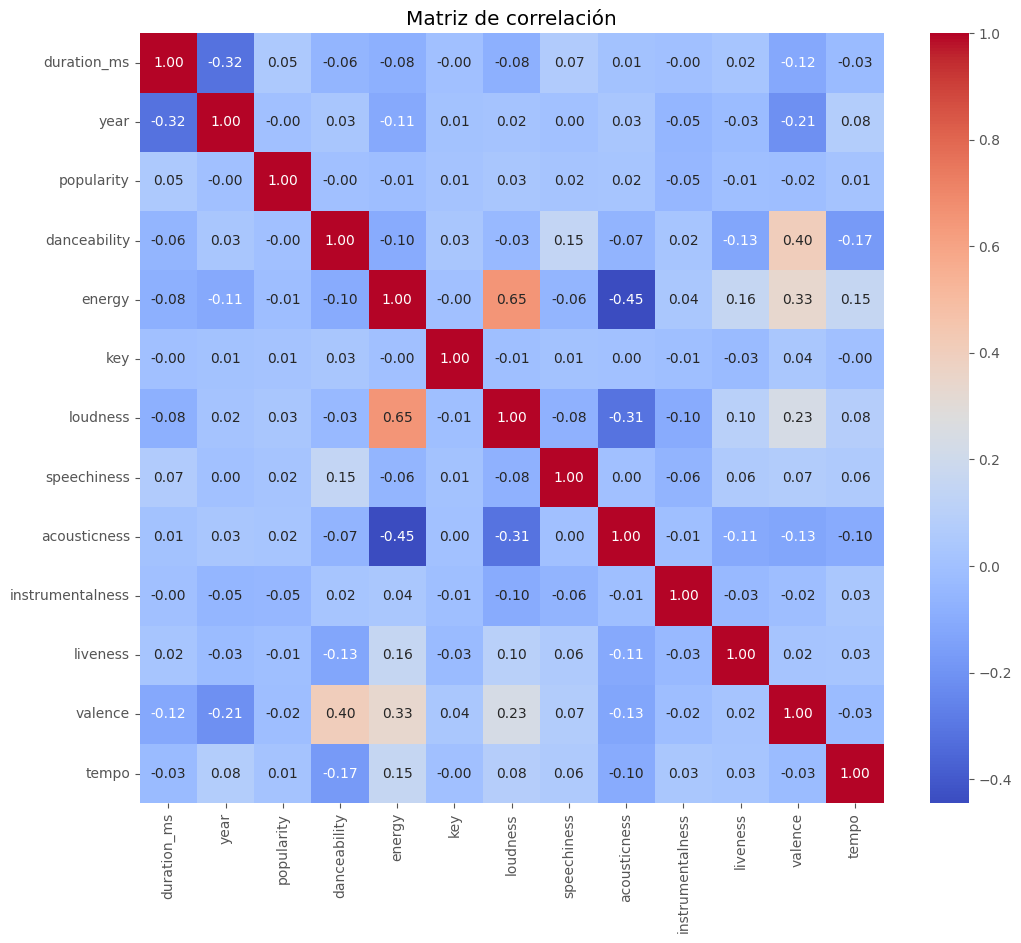

In [514]:
correlation_matrix = songs_df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

<Axes: >

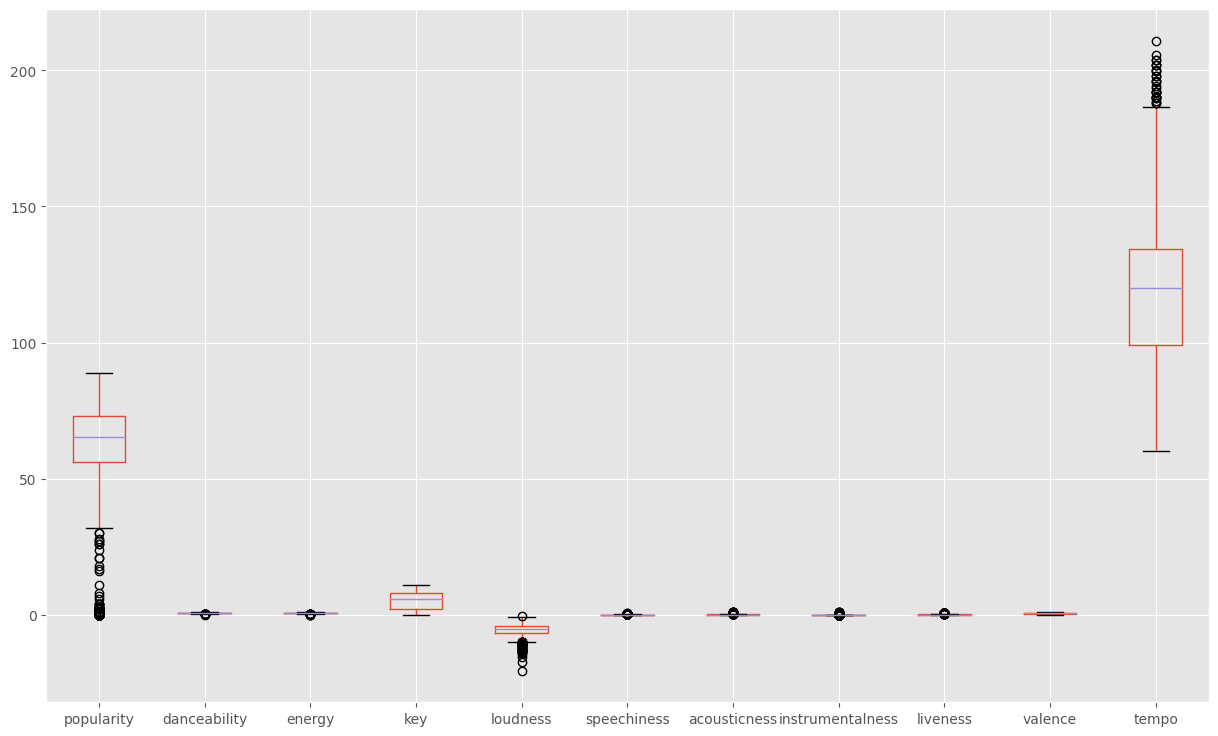

In [515]:
songs_df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].boxplot()

<Axes: >

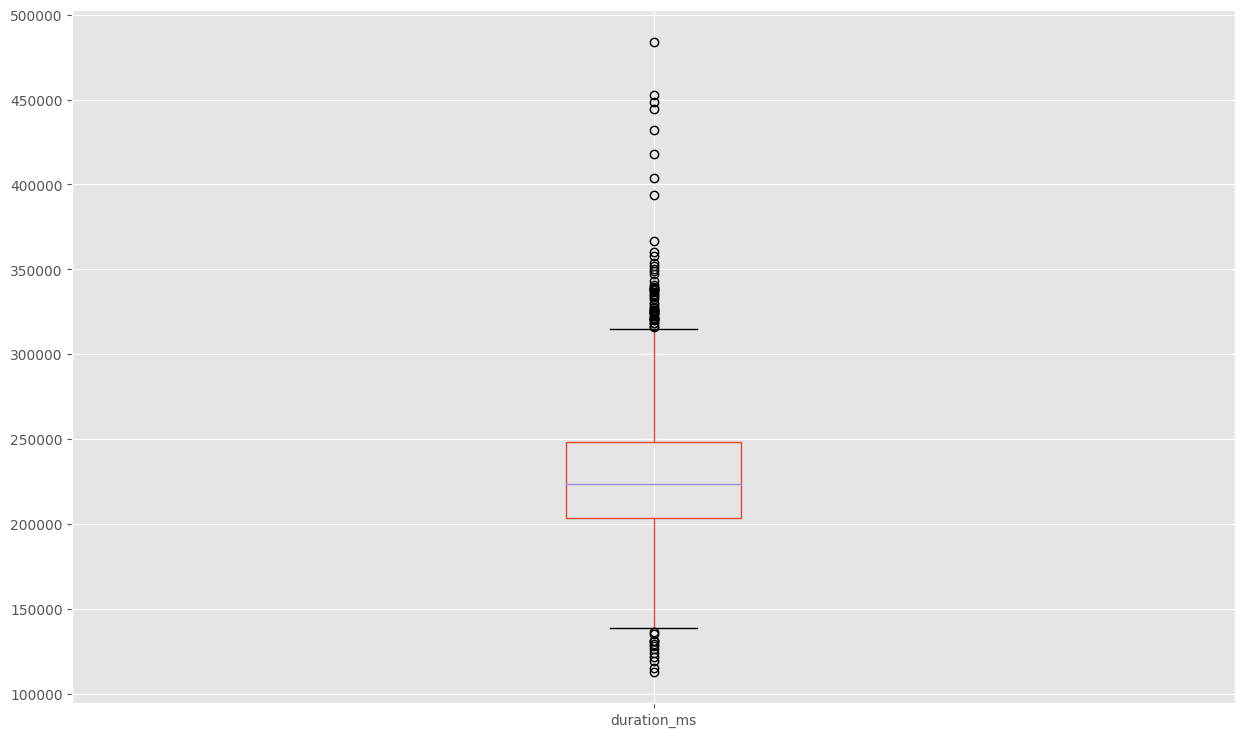

In [516]:
songs_df[['duration_ms']].boxplot()

In [517]:
songs_df = songs_df[songs_df["duration_ms"] < 375000]

<Axes: >

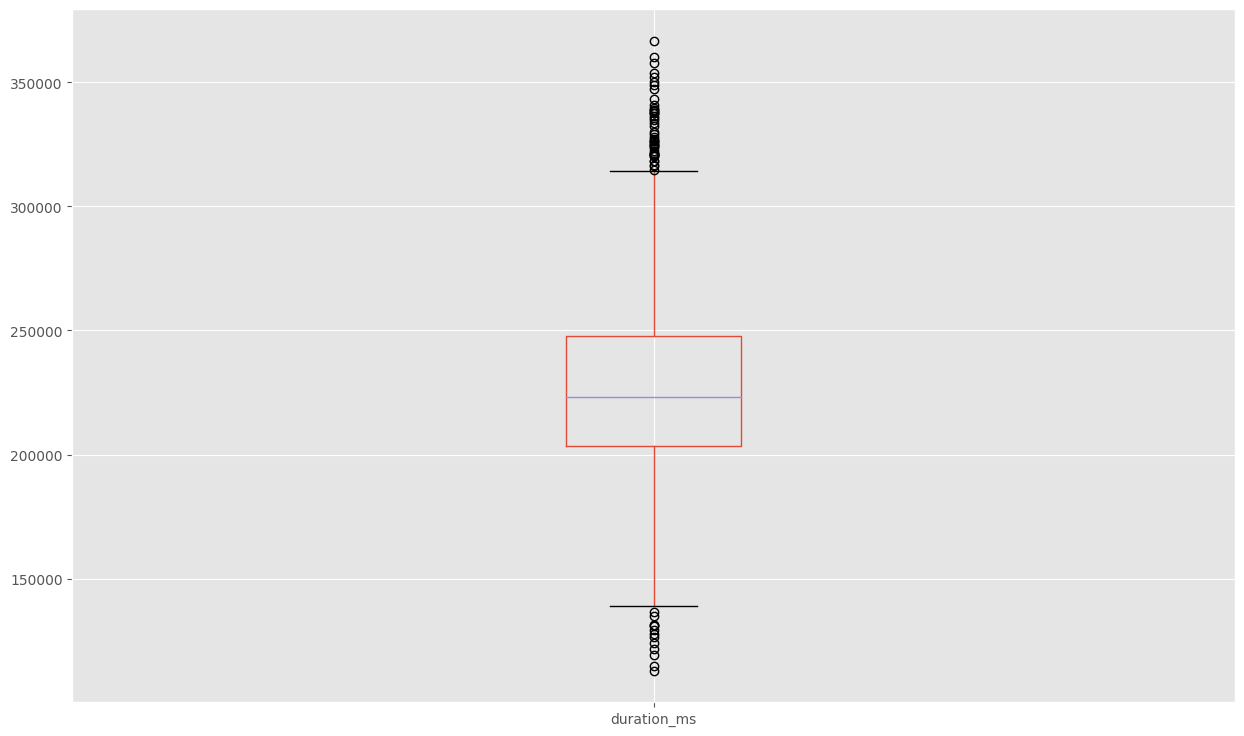

In [518]:
songs_df[['duration_ms']].boxplot()

In [519]:
# Assuming df is your DataFrame and 'column_name' is your categorical variable
counts = songs_df['explicit'].value_counts()

print(counts)

False    1444
True      548
Name: explicit, dtype: int64


In [520]:
# Assuming df is your DataFrame and 'column_name' is your categorical variable
counts = songs_df['genre'].value_counts()

print(counts)

pop                                      425
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  123
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          38
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     14
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

In [521]:
categorical_cols.remove('mode')
categorical_cols.remove('song')
numerical_cols.remove('popularity')
songs_df.pop('song')
songs_df = pd.get_dummies(songs_df, columns=['artist', 'explicit', 'genre'])

In [522]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
target = songs_df.pop("popularity")
data = songs_df


In [523]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1.360
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.52e-05
Time:                        11:43:15   Log-Likelihood:                -5630.1
No. Observations:                1394   AIC:                         1.262e+04
Df Residuals:                     713   BIC:                         1.619e+04
Df Model:                         680                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

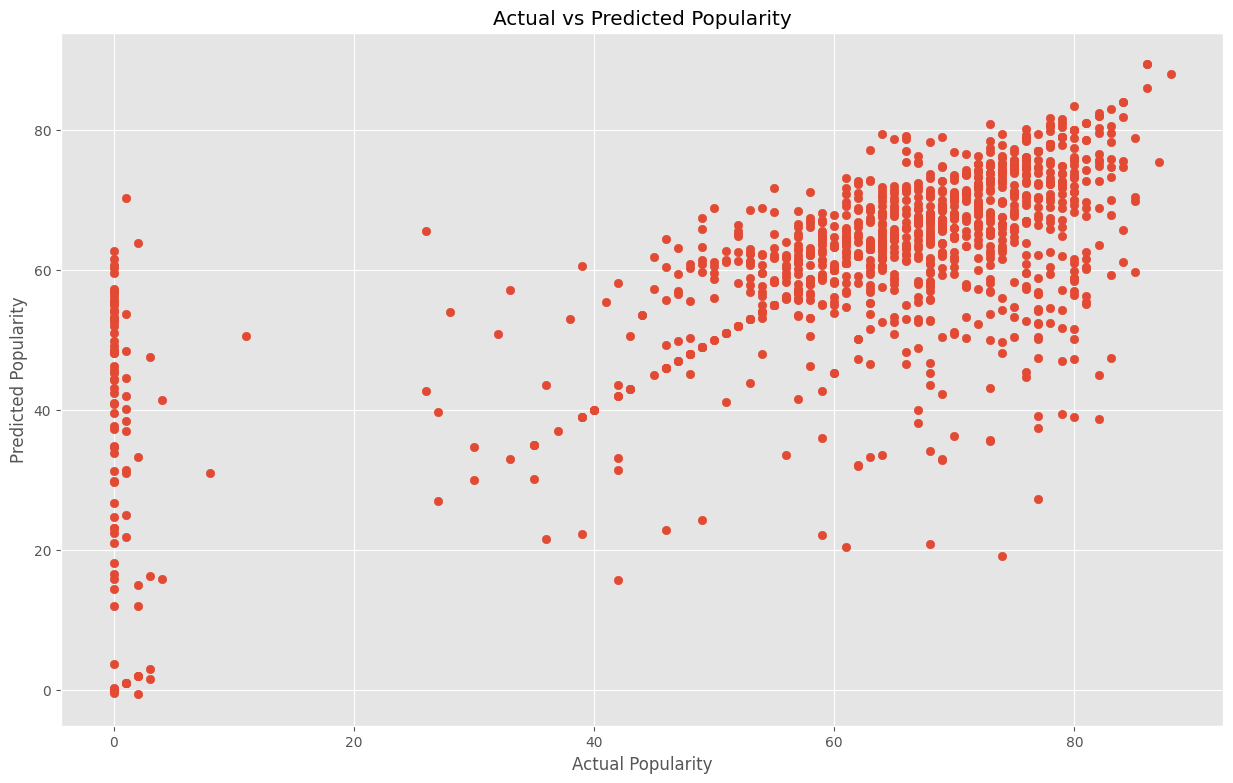

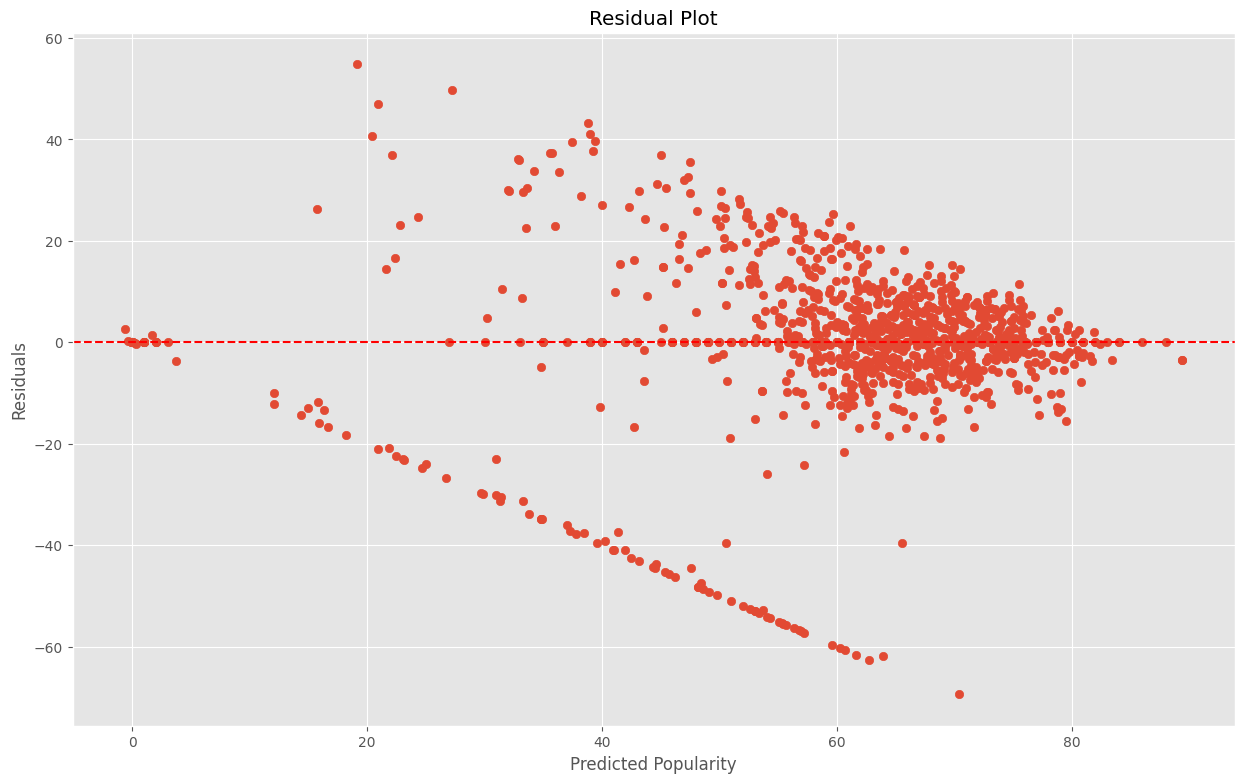

In [524]:
# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(data_train)

# Modelo de regresión lineal
model = sm.OLS(target_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X_train_const)

# Gráfico de dispersión y línea de regresión
plt.scatter(target_train, predictions)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

# Gráfico de residuos
residuals = target_train - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [525]:
# Añadir una constante para el término de intercepción
X_train_const_VIF = sm.add_constant(data_train[numerical_cols])

# Modelo de regresión lineal
model_VIF = sm.OLS(target_train, X_train_const_VIF).fit()

# Resumen del modelo
print(model_VIF.summary())

# Hacer predicciones
predictions = model_VIF.predict(X_train_const_VIF)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_train[numerical_cols].values, i) for i in range(data_train[numerical_cols].shape[1])]
vif["features"] = data_train[numerical_cols].columns

print(vif)

# Calculate R-squared
r_squared = model_VIF.rsquared
print('R-squared:', r_squared)

# Calculate Adjusted R-squared
adjusted_r_squared = model_VIF.rsquared_adj
print('Adjusted R-squared:', adjusted_r_squared)
# Check for overfitting
predictions_val = model_VIF.predict(sm.add_constant(data_test[numerical_cols]))
mse_train = mean_squared_error(target_train, predictions)
mse_val = mean_squared_error(target_test, predictions_val)

print('Training MSE:', mse_train)
print('Validation MSE:', mse_val)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.063
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.388
Time:                        11:43:15   Log-Likelihood:                -6203.4
No. Observations:                1394   AIC:                         1.243e+04
Df Residuals:                    1381   BIC:                         1.250e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               94.5019    215.641  

MSE (test): 526.457677139996
MAE (test): 15.308772142637498
RMSE (test): 22.944665548662854


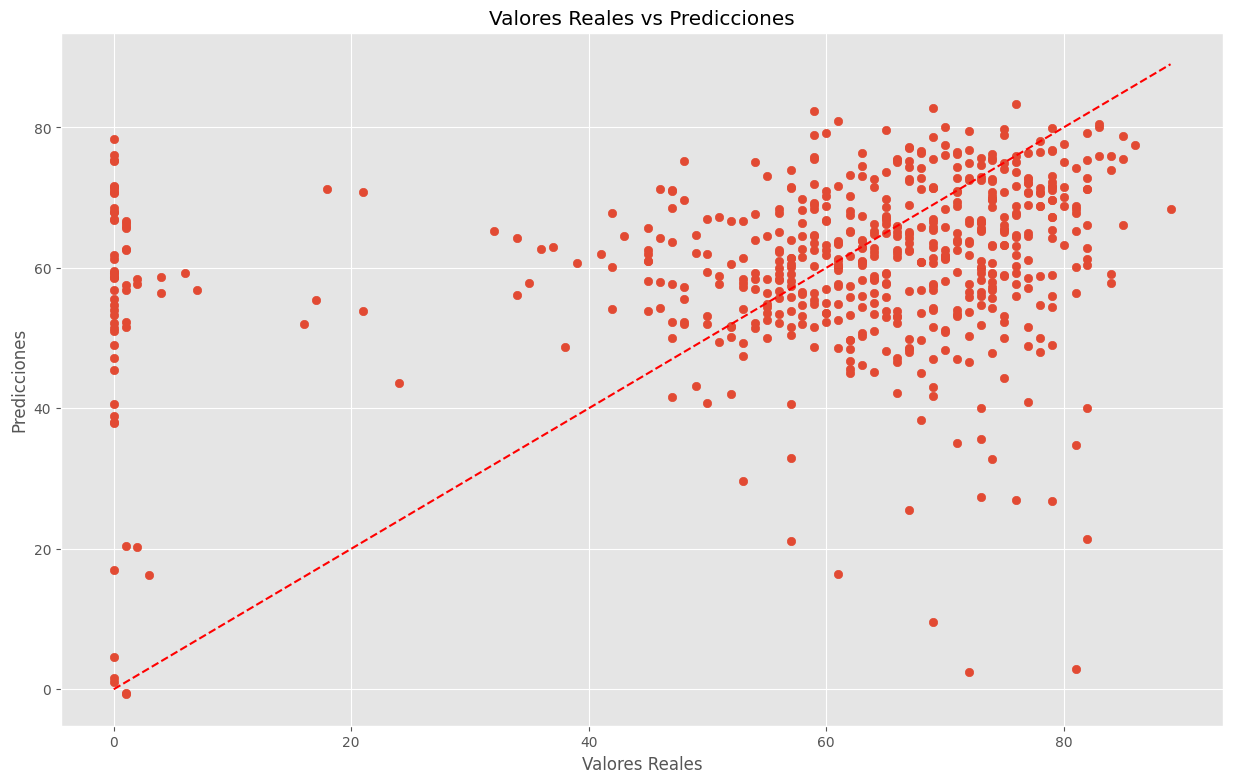

In [526]:
X_test_const = sm.add_constant(data_test)

# Calcular las predicciones del modelo en el conjunto de prueba
y_pred_test = model.predict(X_test_const)

# Calcular el MSE en el conjunto de prueba
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Crear un gráfico de dispersión de los valores reales vs las predicciones
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

plt.show()

In [527]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross-validation
scores = cross_val_score(model, data_train, target_train, cv=5, scoring='neg_mean_squared_error')

# Take the square root and make positive (because cross_val_score returns negative values for MSE)
rmse_scores = np.sqrt(-scores)

print("RMSE Scores:", rmse_scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard Deviation:", rmse_scores.std())

RMSE Scores: [19.36272871 20.84477605 19.31399713 21.96896646 22.82153452]
RMSE Mean: 20.862400574676446
RMSE Standard Deviation: 1.3935259918064078


In [528]:
from sklearn.feature_selection import RFE

model = Lasso(alpha=0.1)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(data_train, target_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

MSE (test): 492.87806698819566
MAE (test): 14.90334058753837
RMSE (test): 22.200857348043918


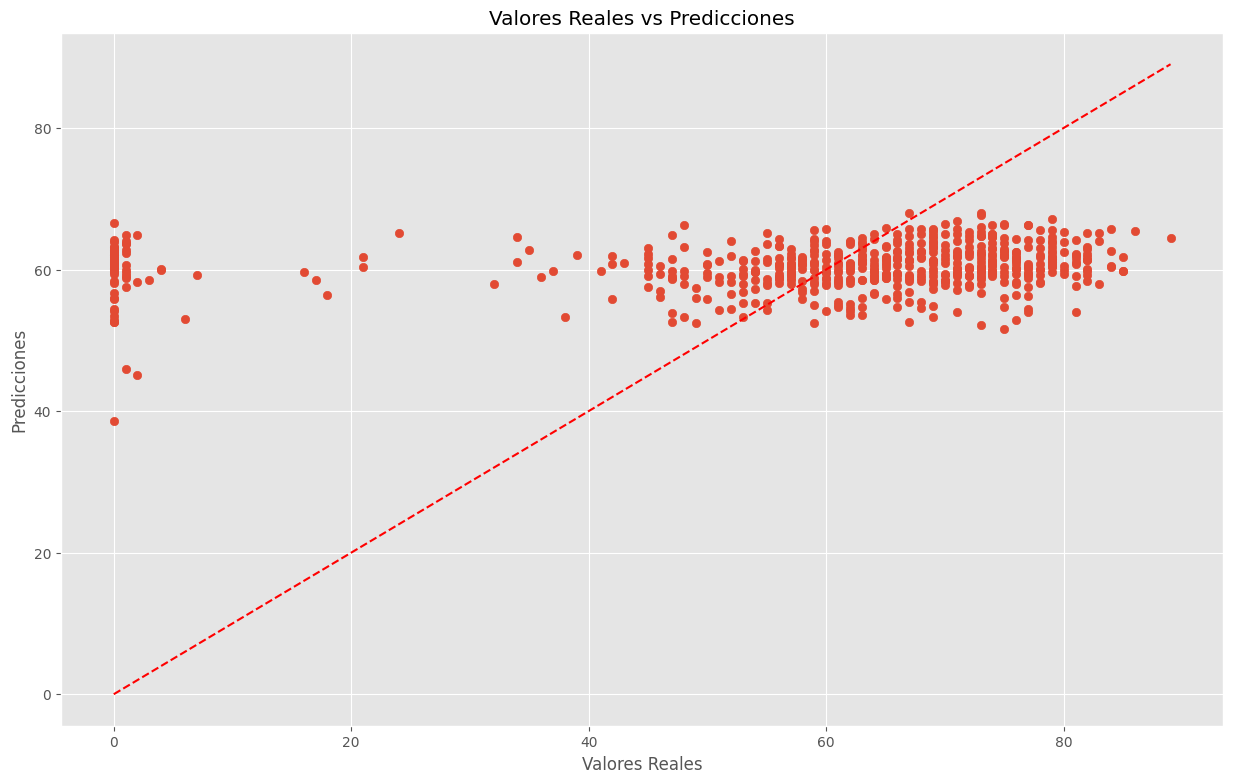

In [529]:

# Define the model
model = Lasso(alpha=0.1)

# Fit the model
model.fit(data_train, target_train)

# Make predictions
y_pred_test = model.predict(data_test)

# Calculate MSE and RMSE
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Plot the predictions
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.063
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.388
Time:                        11:43:48   Log-Likelihood:                -6203.4
No. Observations:                1394   AIC:                         1.243e+04
Df Residuals:                    1381   BIC:                         1.250e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               94.5019    215.641  

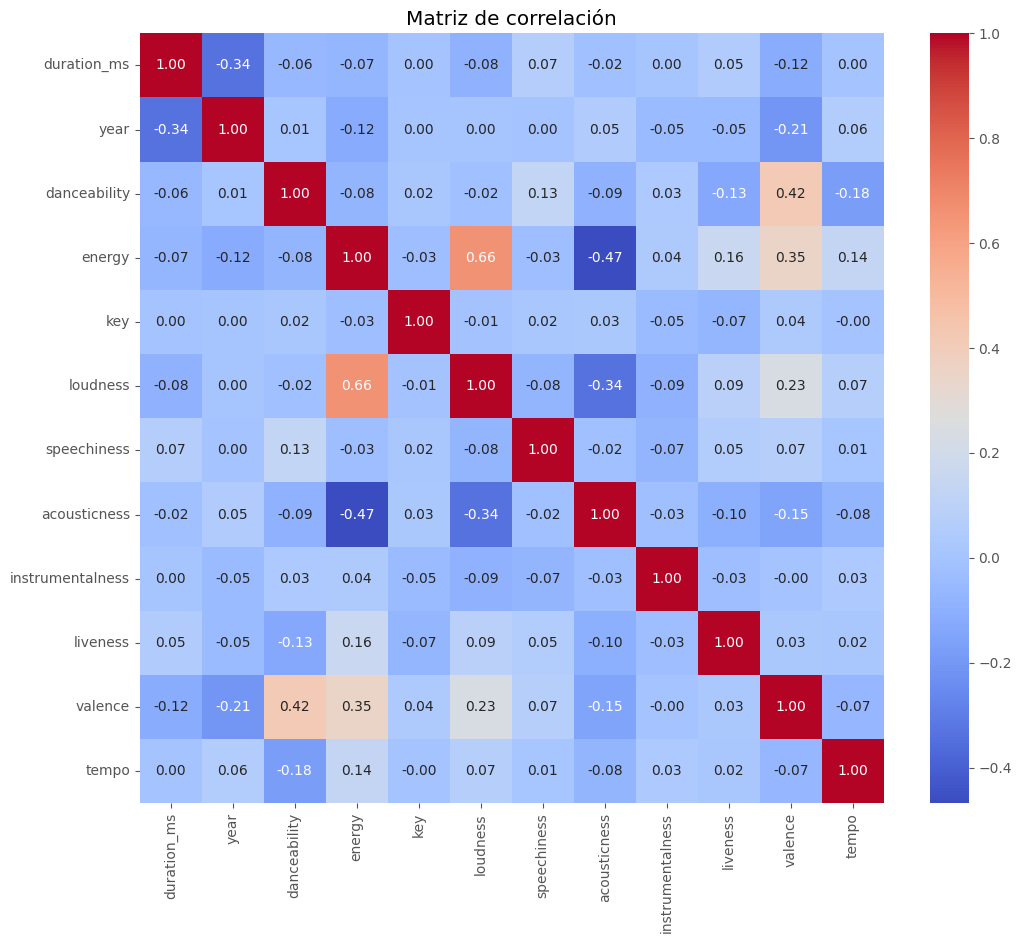

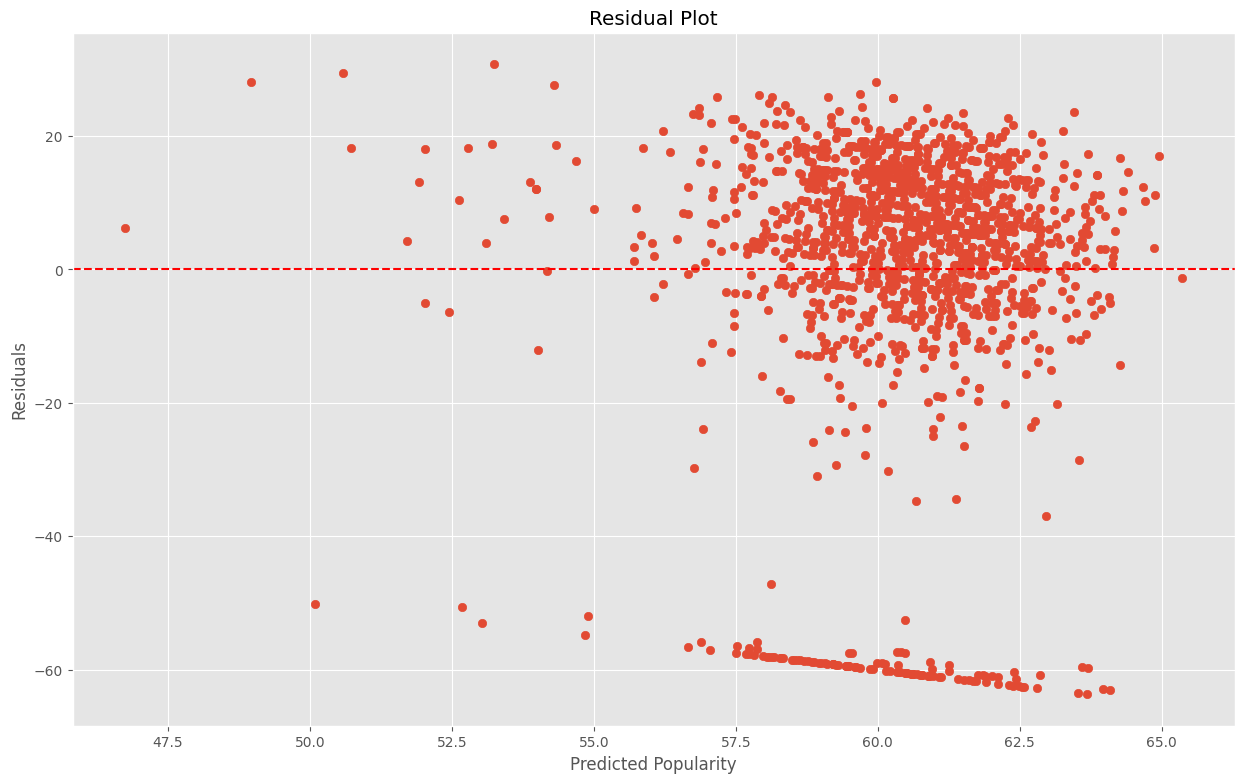


R^2 en los datos de prueba: -0.0067851255880249095


In [530]:
# Añadir una constante para el término de intercepción
X_train_const_VIF = sm.add_constant(data_train[numerical_cols])

# Modelo de regresión lineal
model_VIF = sm.OLS(target_train, X_train_const_VIF).fit()

# Resumen del modelo
print(model_VIF.summary())

# Análisis de multicolinealidad (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = data_train[numerical_cols].columns
vif_data["VIF"] = [variance_inflation_factor(data_train[numerical_cols].values, i) for i in range(len(data_train[numerical_cols].columns))]
print("\nAnálisis de multicolinealidad (VIF):")
print(vif_data)

# Matriz de correlación
correlation_matrix = data_train[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

# Análisis de residuos
residuals = target_train - model_VIF.predict(X_train_const_VIF)
plt.scatter(model_VIF.predict(X_train_const_VIF), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluar el modelo en los datos de prueba
X_test_const_VIF = sm.add_constant(data_test[numerical_cols])
test_predictions = model_VIF.predict(X_test_const_VIF)
test_residuals = target_test - test_predictions
test_r_squared = r2_score(target_test, test_predictions)
print("\nR^2 en los datos de prueba:", test_r_squared)
